#EJERCICIO 2:

In [ ]:
!pip install -q gdown

In [ ]:
import gdown
import zipfile
# TP1-2-Dry-Bean-Dataset.csv
gdown.download('https://drive.google.com/uc?id=1SUwYRZ_6ZWEQQ7FJxniqQCrnHCsBlQcJ')

Downloading...
From: https://drive.google.com/uc?id=1SUwYRZ_6ZWEQQ7FJxniqQCrnHCsBlQcJ
To: /content/TP1-2-Dry-Bean-Dataset.zip
100%|██████████| 1.33M/1.33M [00:00<00:00, 99.0MB/s]


'TP1-2-Dry-Bean-Dataset.zip'

In [ ]:
with zipfile.ZipFile('TP1-2-Dry-Bean-Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./TP1-2')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, stats

# Importaciones de scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error

# Manejo de desequilibrio de clases
from imblearn.over_sampling import RandomOverSampler

# Modelos y métricas de TensorFlow y Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
df = pd.read_csv('/content/TP1-2/TP1-2-Dry-Bean-Dataset.csv')
df2 = df.copy()
df2["AspectRatio"] = df2["MajorAxisLength"]/df2["MinorAxisLength"]
df2["Roundness"] = (4 * np.pi * df2["Area"]) / (df2["Perimeter"] ** 2)
df2

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,AspectRatio,Roundness
0,28395,610.291,208.178117,173.888747,0.549812,28715,190.141097,0.763923,0.988856,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,1.197191,0.958027
1,28734,638.018,200.524796,182.734419,0.411785,29172,191.272750,0.783968,0.984986,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,1.097356,0.887034
2,29380,624.110,212.826130,175.931143,0.562727,29690,193.410904,0.778113,0.989559,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,1.209713,0.947849
3,30008,645.884,210.557999,182.516516,0.498616,30724,195.467062,0.782681,0.976696,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,1.153638,0.903936
4,30140,620.134,201.847882,190.279279,0.333680,30417,195.896503,0.773098,0.990893,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,1.060798,0.984877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,0.765002,42508,231.515799,0.714574,0.990331,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,1.552728,0.916603
13607,42101,757.499,281.576392,190.713136,0.735702,42494,231.526798,0.799943,0.990752,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,1.476439,0.922015
13608,42139,759.321,281.539928,191.187979,0.734065,42569,231.631261,0.729932,0.989899,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,1.472582,0.918424
13609,42147,763.779,283.382636,190.275731,0.741055,42667,231.653248,0.705389,0.987813,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,1.489326,0.907906


In [ ]:
df2.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,AspectRatio,Roundness
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,0.750895,53768.200206,253.064220,0.749733,0.987143,0.799864,0.006564,0.001716,0.643590,0.995063,1.583242,0.873282
std,29324.095717,214.289696,85.694186,44.970091,0.092002,29774.915817,59.177120,0.049086,0.004660,0.061713,0.001128,0.000596,0.098996,0.004366,0.246678,0.059520
min,20420.000000,524.736000,183.601165,122.512653,0.218951,20684.000000,161.243764,0.555315,0.919246,0.640577,0.002778,0.000564,0.410339,0.947687,1.024868,0.489618
25%,36328.000000,703.523500,253.303633,175.848170,0.715928,36714.500000,215.068003,0.718634,0.985670,0.762469,0.005900,0.001154,0.581359,0.993703,1.432307,0.832096
50%,44652.000000,794.941000,296.883367,192.431733,0.764441,45178.000000,238.438026,0.759859,0.988283,0.801277,0.006645,0.001694,0.642044,0.996386,1.551124,0.883157
75%,61332.000000,977.213000,376.495012,217.031741,0.810466,62294.000000,279.446467,0.786851,0.990013,0.834270,0.007271,0.002170,0.696006,0.997883,1.707109,0.916869
max,254616.000000,1985.370000,738.860153,460.198497,0.911423,263261.000000,569.374358,0.866195,0.994677,0.987303,0.010451,0.003665,0.974767,0.999733,2.430306,0.990685


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   Eccentricity     13611 non-null  float64
 5   ConvexArea       13611 non-null  int64  
 6   EquivDiameter    13611 non-null  float64
 7   Extent           13611 non-null  float64
 8   Solidity         13611 non-null  float64
 9   Compactness      13611 non-null  float64
 10  ShapeFactor1     13611 non-null  float64
 11  ShapeFactor2     13611 non-null  float64
 12  ShapeFactor3     13611 non-null  float64
 13  ShapeFactor4     13611 non-null  float64
 14  Class            13611 non-null  object 
 15  AspectRatio      13611 non-null  float64
 16  Roundness        13611 non-null  float64
dtypes: float64(1

In [ ]:
print(f'Cantidad de registros: {df2.shape[0]}')
print(f'Registros con todos los datos presentes: {df2.notnull().all(axis=1).sum()}')

print('Cantidad de registros faltantes para cada variable')
df2.isna().sum()

Cantidad de registros: 13611
Registros con todos los datos presentes: 13611
Cantidad de registros faltantes para cada variable


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
AspectRatio        0
Roundness          0
dtype: int64

Podemos ver que no hay ningun dato faltante

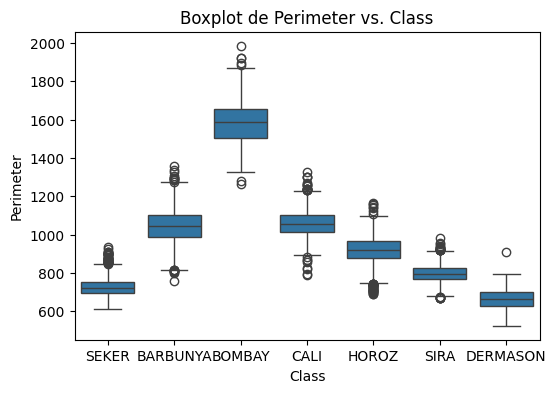

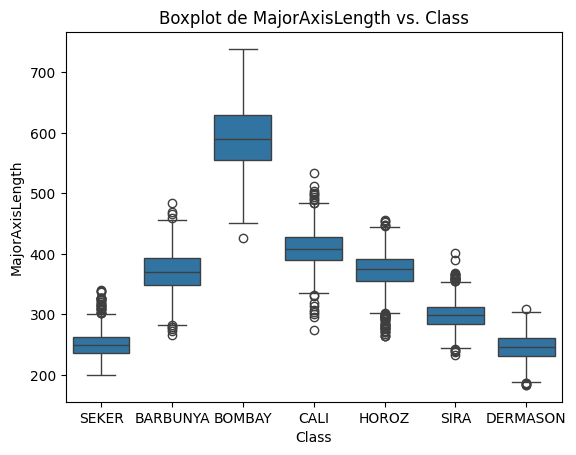

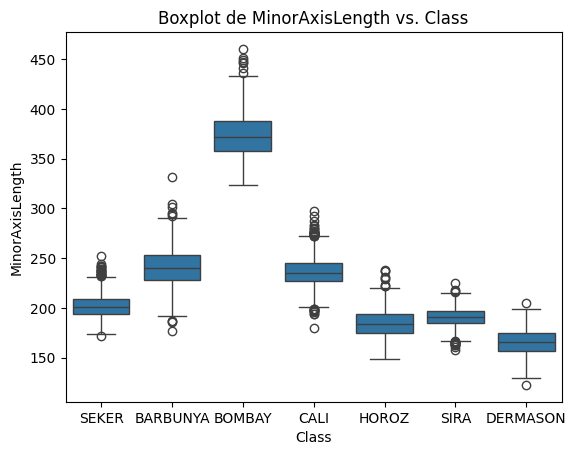

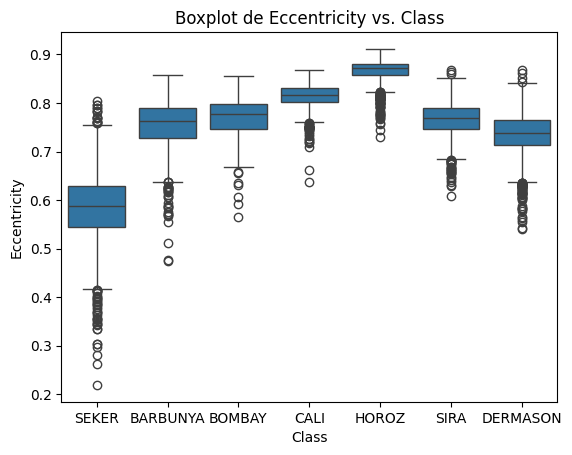

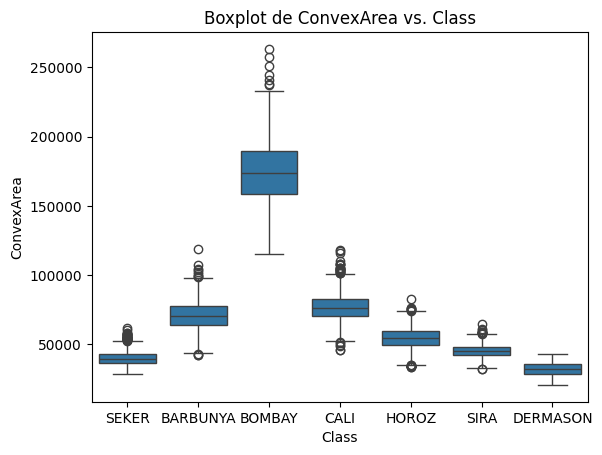

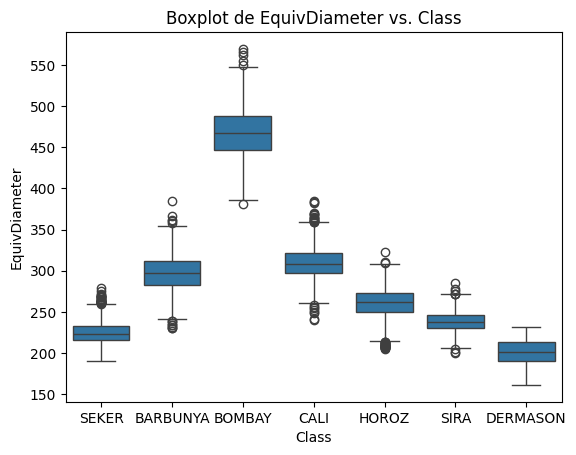

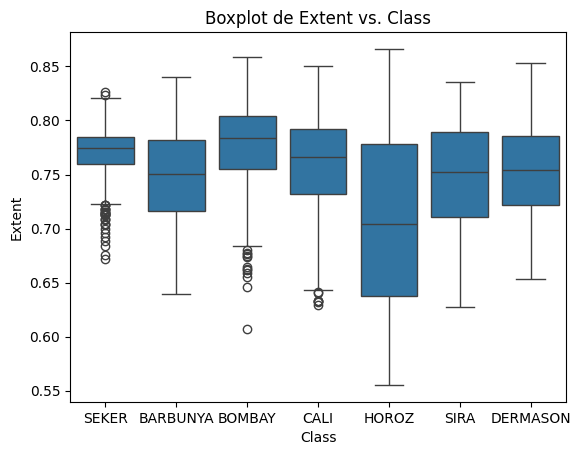

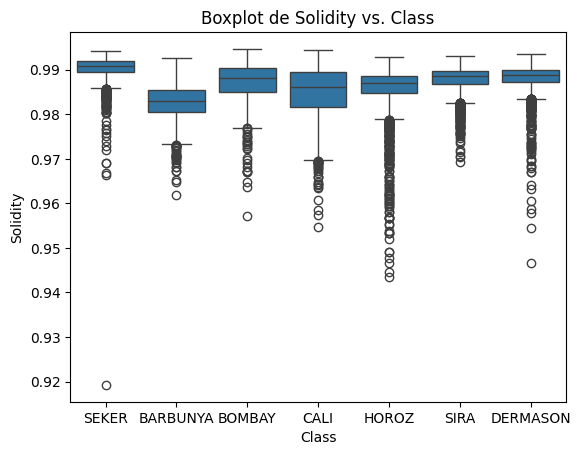

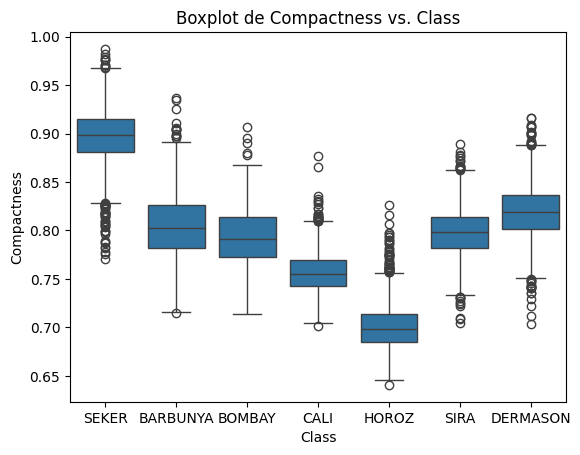

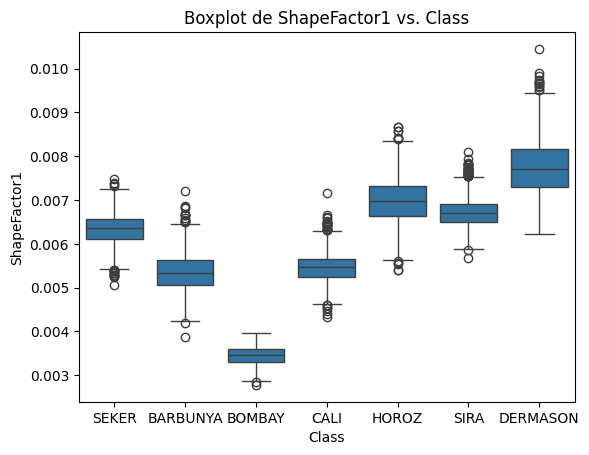

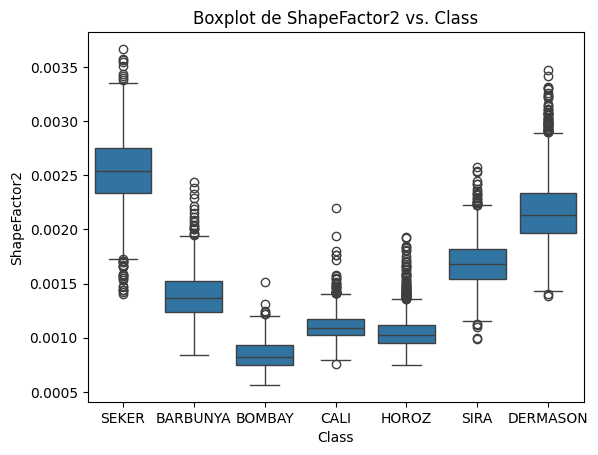

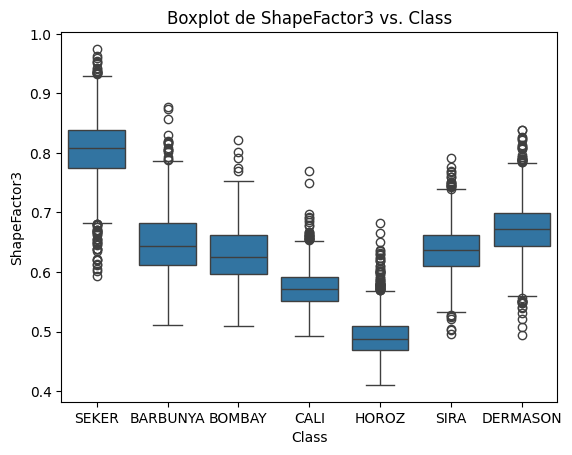

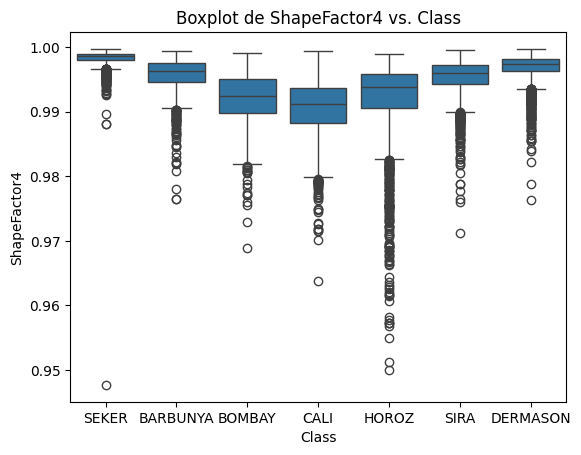

In [ ]:
plt.figure(figsize=(6, 4))

for column in df.describe().columns[1:]:
    if column != 'Class':
        sns.boxplot(x='Class', y=column, data=df)
        plt.title(f'Boxplot de {column} vs. Class')
        plt.ylabel(column)
        plt.show()

Text(0.5, 1.0, 'Class Distribution')

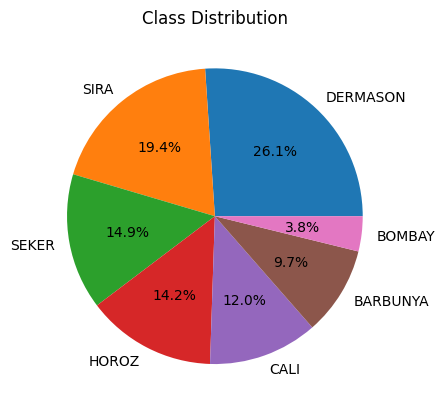

In [ ]:
rain_today_counts = df['Class'].value_counts()

plt.pie(rain_today_counts, labels=rain_today_counts.index, autopct='%1.1f%%')

plt.title('Class Distribution')


Vemos que estan desbalanceadas las clases, luego vamos a balancearlas con un oversampler

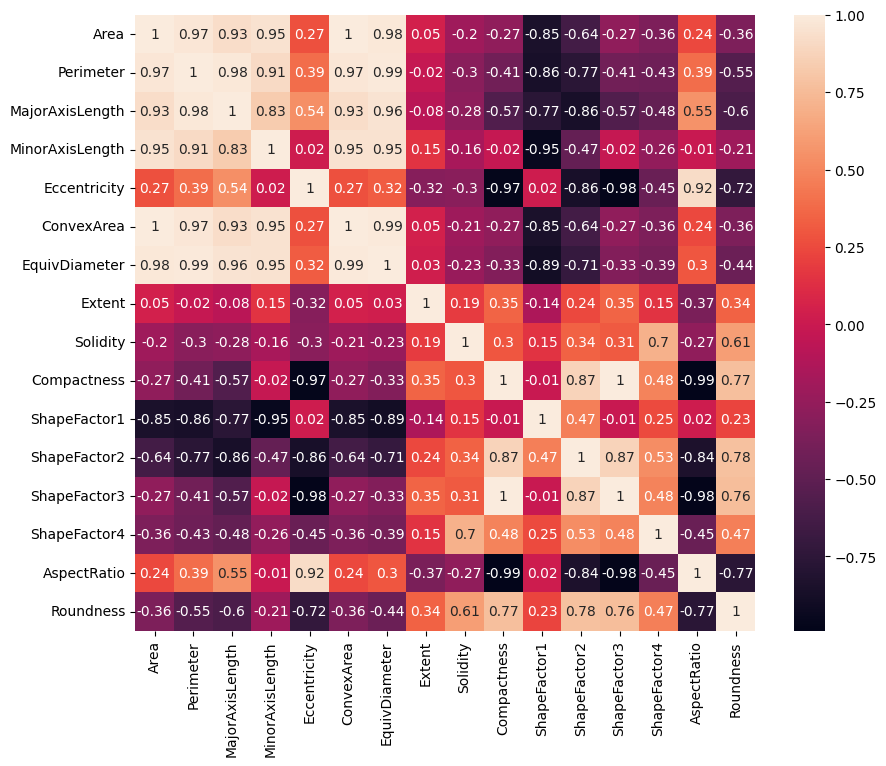

In [ ]:
plt.figure(figsize=(10, 8))
X = df2.drop(columns=["Class"])
sns.heatmap(X.corr().select_dtypes(include=[np.number]).round(2), annot=True)

plt.show()

Podemos ver que Area y ConvexArea, ShapeFactor3 y Compactness,EquivDiameter y Perimeter y AspectRatio y Compactness tienen mucha correlacion, asi que para reducir el ruido, vamos a eliminar las siguientes variables: ConvexArea, ShapeFactor3 y Compactness, EquivDiameter

In [ ]:
X_red = X.drop(columns= ["ShapeFactor3","Compactness","ConvexArea","EquivDiameter"])

In [ ]:
def numericas_categoricas(df2):
  '''Divide el dataframe en variables numéricas
  y categóricas'''
  numerical = []
  categorical = []
  for columna in df2.columns:
    if df2[columna].dtype in ['float64','int64']:
      numerical.append(columna)
    if df2[columna].dtype == 'object':
      categorical.append(columna)
  return numerical

In [ ]:
numerical = numericas_categoricas(X_red)

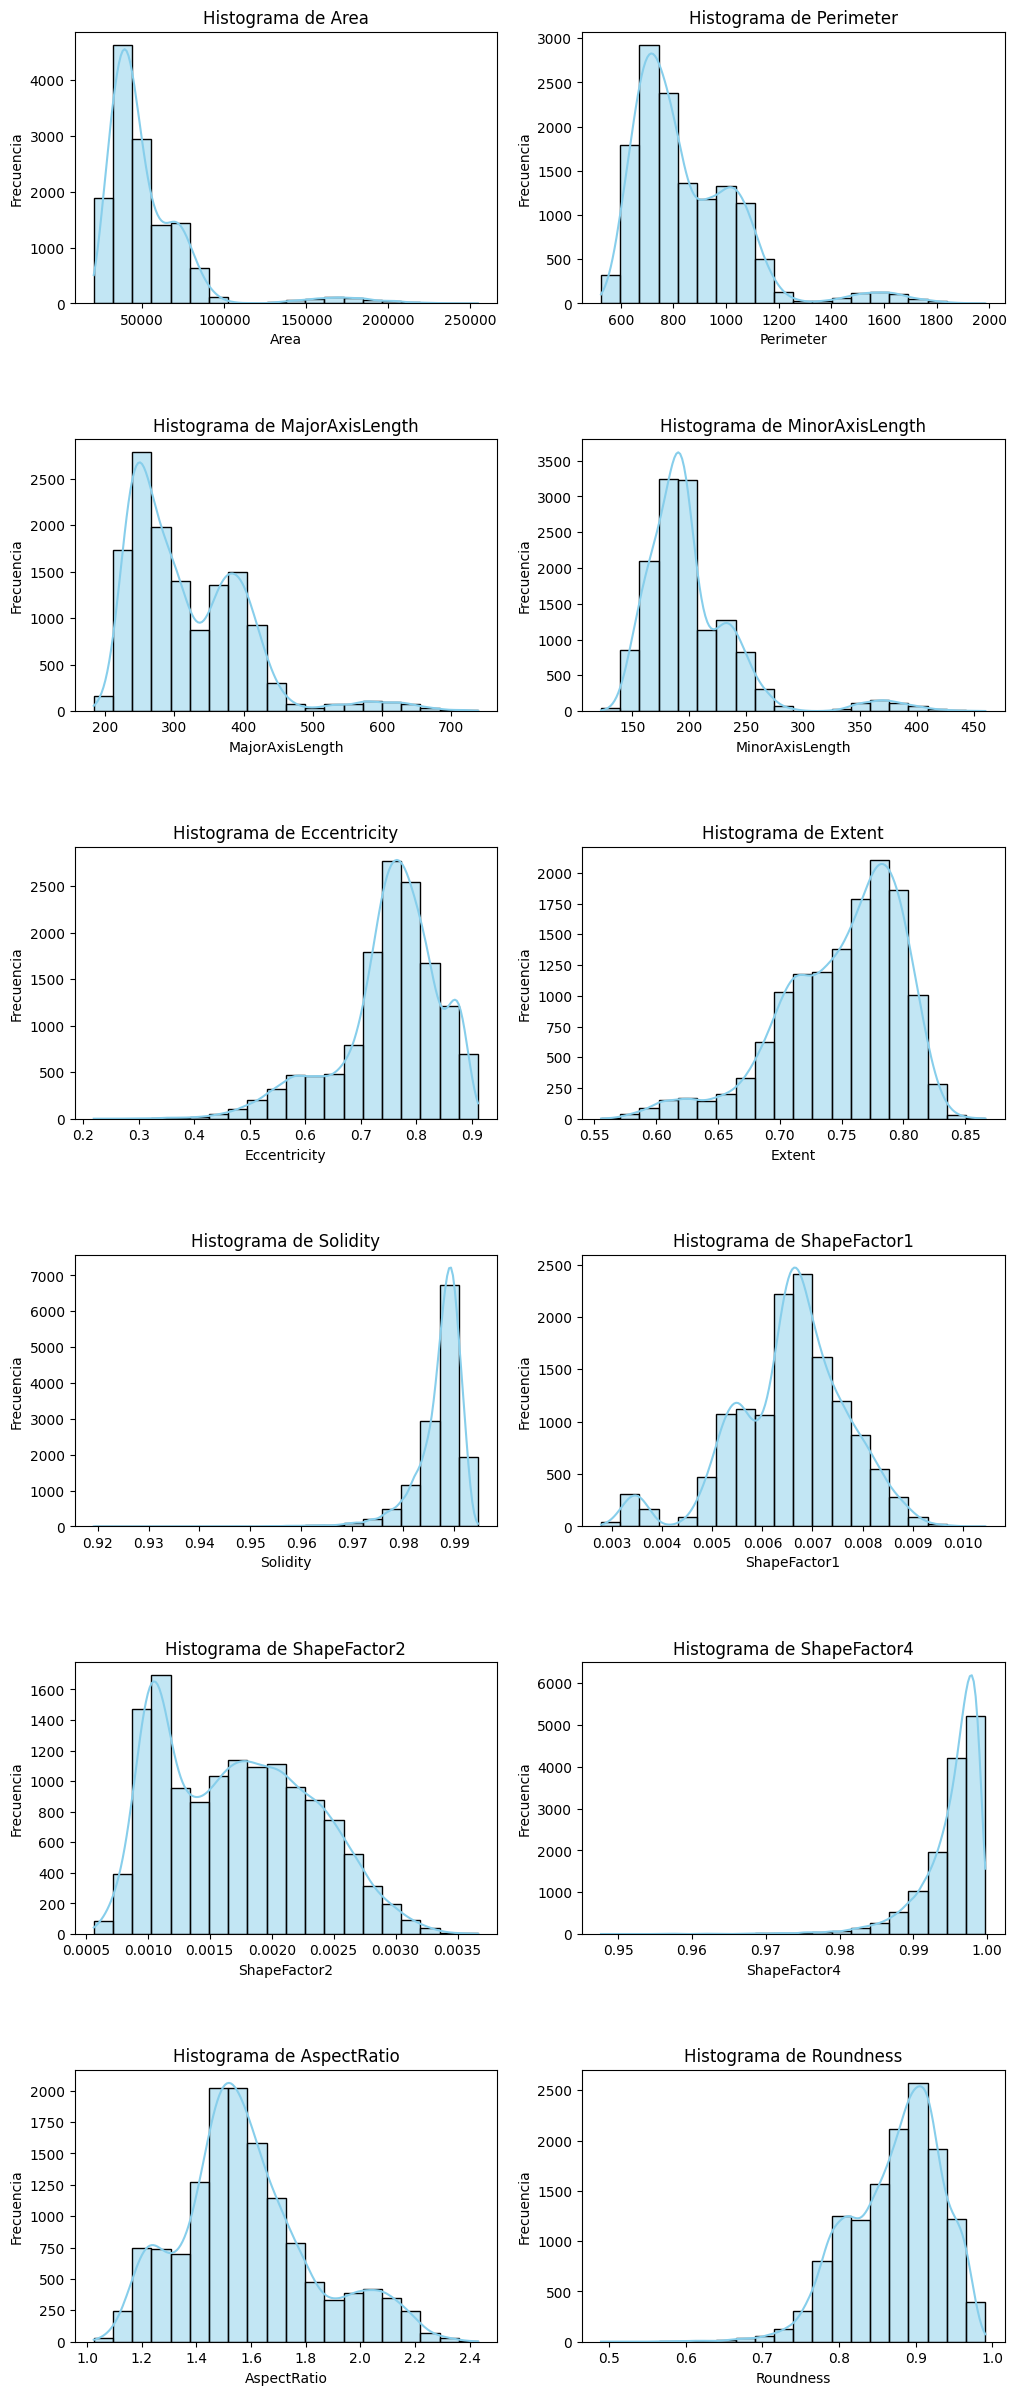

In [ ]:
def plot_histogramas(df, numerical):
    num_cols = len(numerical)
    num_rows = (num_cols // 2) + (1 if num_cols % 2 != 0 else 0)

    fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 5))
    fig.subplots_adjust(hspace=0.5)

    for i, column in enumerate(numerical):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        sns.histplot(df[column], bins=20, kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Histograma de {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frecuencia')

    # Eliminar el último subplot si hay un número impar de columnas
    if num_cols % 2 != 0:
        fig.delaxes(axes[num_rows-1, 1])

    plt.show()

# Uso de la función
plot_histogramas(X_red, numerical)

No se observa nada extraño de estos histogramas

In [ ]:
y = df2["Class"]
print(y.unique())
y

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

Hacemos un oversampler para poder sacar concluciones certeras a partir del accuracy

In [ ]:
ros = RandomOverSampler(random_state=42)

# Aplicamos el algoritmo
X_res, y_res = ros.fit_resample(X_red, y)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)

In [ ]:
print(X_res.shape)

(24822, 12)


Pasamos la variable a predecir como labelencoding para que entre al modelo

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

target_encoded = le.fit_transform(y_res)
target_encoded

array([5, 5, 5, ..., 6, 6, 6])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target_encoded, test_size=0.15, random_state=42)
y_train

array([5, 4, 0, ..., 5, 0, 5])

In [ ]:
X_train.shape

(21098, 12)

In [ ]:
df = pd.DataFrame(X_train)

# Print the DataFrame to verify the conversion
print(df)

             0         1         2         3         4         5         6   \
0     -0.750001 -0.980188 -1.181951 -0.444573 -2.884022  0.707967  0.798583   
1     -0.415108 -0.243189  0.028598 -0.737751  1.276062 -0.273281 -1.722609   
2      0.204075  0.590131  0.234530  0.493898 -0.136022 -0.299949 -2.405442   
3      0.006548  0.157950  0.318776 -0.024328  0.744908  1.157965  0.202403   
4      2.278637  2.072156  2.082293  2.156495  0.330395  0.899166  0.954441   
...         ...       ...       ...       ...       ...       ...       ...   
21093 -0.486948 -0.348999 -0.166765 -0.756738  1.099243  1.397381  0.143607   
21094  0.432182  0.620666  0.810564  0.366511  0.838495  0.632854  0.920736   
21095 -0.683221 -0.877305 -1.014908 -0.436944 -1.777484 -0.005288  0.733058   
21096 -0.040358  0.192581 -0.045599  0.222293 -0.228804  0.193154 -0.508627   
21097 -0.520381 -0.648474 -0.700913 -0.310065 -0.820972 -0.163431  1.060722   

             7         8         9         10      

Aca implementamos el modelo, le añadimos dropout para evitar el overfitting, tiene un earlystopping para que pare cuando le parezca adecuado, y una activacion softmax para la clasificacion

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    # Capa de entrada
    layers.Dense(64, activation='relu', input_shape=(12,)),
    layers.Dropout(0.2),

    # Capas ocultas ocultas
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    # Capa de salida
    layers.Dense(7, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callback para EarlyStopping (opcional)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=120, batch_size=32, validation_split = 0.1, callbacks=[early_stopping])

# Evaluar el modelo
model.evaluate(X_test, y_test)

Epoch 1/120
594/594 [==============================] - 6s 7ms/step - loss: 0.3546 - accuracy: 0.8772 - val_loss: 0.2099 - val_accuracy: 0.9251
Epoch 2/120
594/594 [==============================] - 2s 4ms/step - loss: 0.2195 - accuracy: 0.9243 - val_loss: 0.1810 - val_accuracy: 0.9374
Epoch 3/120
594/594 [==============================] - 2s 4ms/step - loss: 0.2056 - accuracy: 0.9304 - val_loss: 0.1824 - val_accuracy: 0.9389
Epoch 4/120
594/594 [==============================] - 2s 4ms/step - loss: 0.1942 - accuracy: 0.9317 - val_loss: 0.1825 - val_accuracy: 0.9365
Epoch 5/120
594/594 [==============================] - 2s 4ms/step - loss: 0.1909 - accuracy: 0.9333 - val_loss: 0.1764 - val_accuracy: 0.9389
Epoch 6/120
594/594 [==============================] - 3s 5ms/step - loss: 0.1831 - accuracy: 0.9342 - val_loss: 0.1693 - val_accuracy: 0.9445
Epoch 7/120
594/594 [==============================] - 3s 5ms/step - loss: 0.1780 - accuracy: 0.9368 - val_loss: 0.1715 - val_accuracy: 0.9417

[0.1514527052640915, 0.9446831345558167]

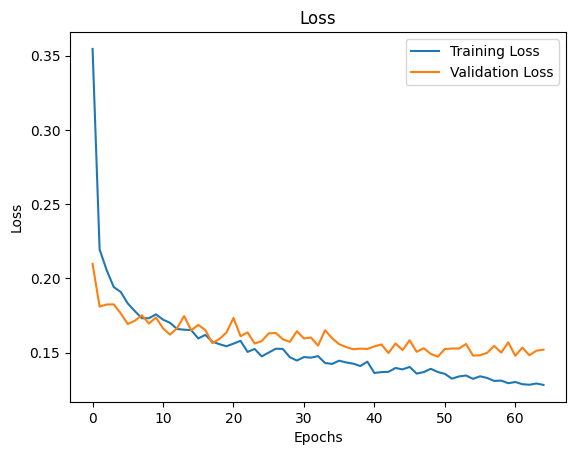

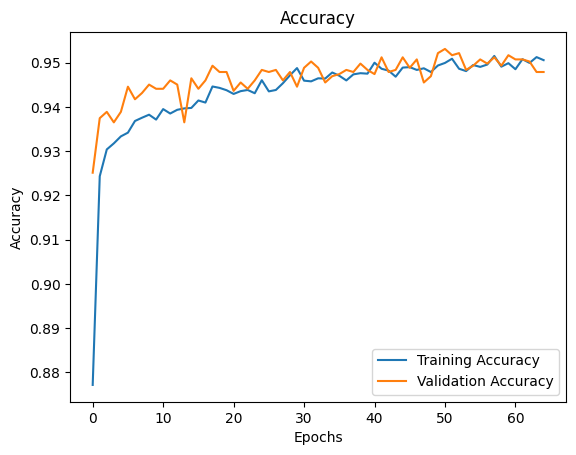

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot loss
epochs = range(len(train_loss))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()